## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from ydata_profiling import ProfileReport

### Read Data

In [38]:
data = pd.read_csv(r'E:\Atom Camp\activities\Python\ML Assignments\USMAN ILTAF - students_adaptability_level_online_education.csv')

In [3]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Generate Data Profiling Report

In [4]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding

Choose a suitable encoding technique for the columns.

In [39]:
# Binary Encoding for 'Gender', 'IT Student', 'Location', 'Load-shedding', 'Self Lms', 'Internet Type', and 'Institution Type'
binary_cols = ['Gender', 'IT Student', 'Location', 'Load-shedding', 'Self Lms', 'Internet Type', 'Institution Type']

# Define the mapping dictionary for binary encoding
binary_mapping = {'Boy': 0, 'Girl': 1, 'No': 0, 'Yes': 1, 'Low': 0, 'High': 1, 'Wifi': 0, 'Mobile Data': 1, 'Government': 0, 'Non Government': 1}

# Apply binary encoding to the specified columns using the replace function
data[binary_cols] = data[binary_cols].replace(binary_mapping)


In [40]:
one_hot_cols = ['Financial Condition', 'Network Type', 'Device']
data = pd.get_dummies(data, columns=one_hot_cols, dtype=int)

In [41]:
# Define the mapping dictionary for ordinal encoding
ordinal_mapping_age = {'1-5': 0, '6-10': 1, '11-15': 2, '16-20': 3, '21-25': 4, '26-30': 5}

# Apply ordinal encoding to the 'Age' column using the map function
data['Age'] = data['Age'].map(ordinal_mapping_age)


In [42]:
# Ordinal Encoding for 'Class Duration'
ordinal_mapping_class_duration = {'0': 0, '1-3': 1, '3-6': 2}
data['Class Duration'] = data['Class Duration'].map(ordinal_mapping_class_duration)

In [43]:
# Ordinal Encoding for 'Education Level'
ordinal_mapping_education = {'School': 0, 'College': 1, 'University': 2}
data['Education Level'] = data['Education Level'].map(ordinal_mapping_education)

# Ordinal Encoding for 'Adaptivity Level'
ordinal_mapping_adaptivity = {'Low': 0, 'Moderate': 1, 'High': 2}
data['Adaptivity Level'] = data['Adaptivity Level'].map(ordinal_mapping_adaptivity)


### Check distribution

C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 16 is out of bounds for axis 0 with size 16

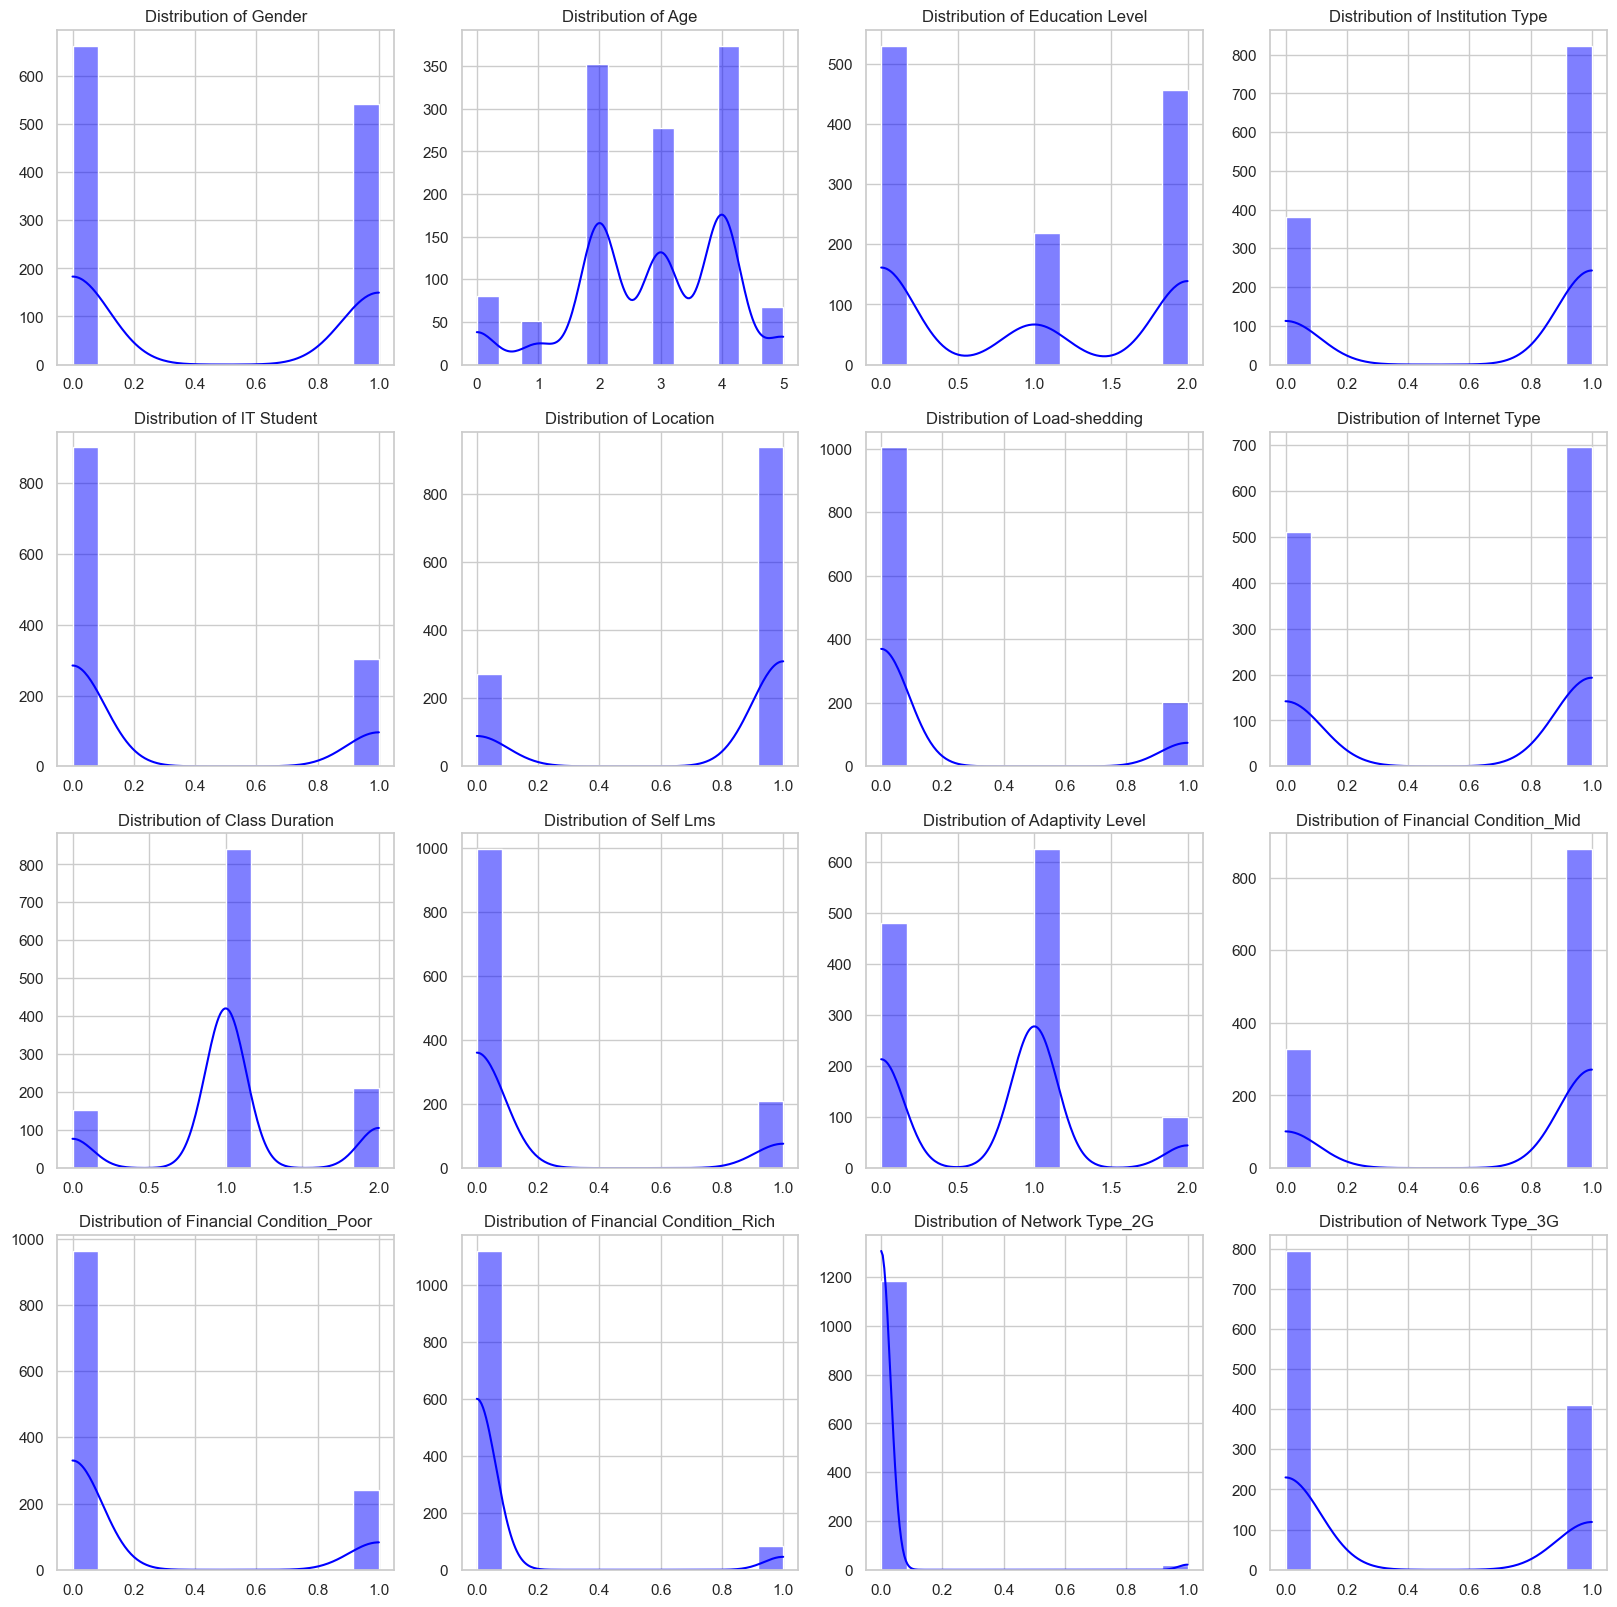

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot its distribution
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(None)  # Remove x-axis label for better visualization
    axes[i].set_ylabel(None)  # Remove y-axis label for better visualization

# Adjust layout
plt.tight_layout()
plt.show()


# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [45]:
X = data.iloc[:, :-1]  # Features
Y = data['Adaptivity Level']  # Target variable

### Feature Scaling

In [46]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [48]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# KNN

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN model:", accuracy_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Classification Report for KNN model:")
print(report_knn)

Accuracy of KNN model: 0.9004149377593361
Classification Report for KNN model:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       103
           1       0.87      0.93      0.90       115
           2       0.94      0.74      0.83        23

    accuracy                           0.90       241
   macro avg       0.91      0.86      0.88       241
weighted avg       0.90      0.90      0.90       241



#### Check different distance metric

**Euclidean**

In [50]:

# Initialize the KNN classifier with Euclidean distance metric
knn_model_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the KNN model on the training data
knn_model_euclidean.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn_euclidean = knn_model_euclidean.predict(X_test)

# Calculate the accuracy
accuracy_knn_euclidean = accuracy_score(y_test, y_pred_knn_euclidean)
print("Accuracy of KNN model with Euclidean distance:", accuracy_knn_euclidean)

# Generate classification report
report_knn_euclidean = classification_report(y_test, y_pred_knn_euclidean)
print("Classification Report for KNN model with Euclidean distance:")
print(report_knn_euclidean)

Accuracy of KNN model with Euclidean distance: 0.9004149377593361
Classification Report for KNN model with Euclidean distance:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       103
           1       0.87      0.93      0.90       115
           2       0.94      0.74      0.83        23

    accuracy                           0.90       241
   macro avg       0.91      0.86      0.88       241
weighted avg       0.90      0.90      0.90       241



**Manhattan**

In [51]:
# Initialize the KNN classifier with Manhattan distance metric
knn_model_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the KNN model on the training data
knn_model_manhattan.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn_manhattan = knn_model_manhattan.predict(X_test)

# Calculate the accuracy
accuracy_knn_manhattan = accuracy_score(y_test, y_pred_knn_manhattan)
print("Accuracy of KNN model with Manhattan distance:", accuracy_knn_manhattan)

# Generate classification report
report_knn_manhattan = classification_report(y_test, y_pred_knn_manhattan)
print("Classification Report for KNN model with Manhattan distance:")
print(report_knn_manhattan)


Accuracy of KNN model with Manhattan distance: 0.9253112033195021
Classification Report for KNN model with Manhattan distance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       103
           1       0.90      0.95      0.92       115
           2       1.00      0.74      0.85        23

    accuracy                           0.93       241
   macro avg       0.95      0.88      0.91       241
weighted avg       0.93      0.93      0.92       241



# Decision Tree

**Using Entropy**

In [52]:
# Initialize the Decision Tree classifier with entropy criterion
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree model on the training data
dt_model_entropy.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt_entropy = dt_model_entropy.predict(X_test)

# Calculate the accuracy
accuracy_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)
print("Accuracy of Decision Tree model with entropy criterion:", accuracy_dt_entropy)

# Generate classification report
report_dt_entropy = classification_report(y_test, y_pred_dt_entropy)
print("Classification Report for Decision Tree model with entropy criterion:")
print(report_dt_entropy)


Accuracy of Decision Tree model with entropy criterion: 1.0
Classification Report for Decision Tree model with entropy criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        23

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



**Use Gini Index**

In [53]:
# Initialize the Decision Tree classifier with Gini index criterion
dt_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the Decision Tree model on the training data
dt_model_gini.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt_gini = dt_model_gini.predict(X_test)

# Calculate the accuracy
accuracy_dt_gini = accuracy_score(y_test, y_pred_dt_gini)
print("Accuracy of Decision Tree model with Gini index criterion:", accuracy_dt_gini)

# Generate classification report
report_dt_gini = classification_report(y_test, y_pred_dt_gini)
print("Classification Report for Decision Tree model with Gini index criterion:")
print(report_dt_gini)


Accuracy of Decision Tree model with Gini index criterion: 1.0
Classification Report for Decision Tree model with Gini index criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        23

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



# All the Best!